# K-Means Clustering Project 

For this project, I will attempt to use KMeans Clustering to cluster Universities into to two groups, Private and Public.

___
**Very important to note, I actually have the labels for this data set, but I will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

In this case we will use the labels to try to get an idea of how well the algorithm performed, but I won't usually do this for Kmeans. Hence, the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting.
___

## The Data

I will use a data frame with 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

I will read in the College_Data file using pandas.

In [2]:
df = pd.read_csv("College_Data",index_col=0)
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [3]:
len(df)

777

In [4]:
df.isnull().sum()

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

I will now create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column.

In [7]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


<Figure size 720x576 with 0 Axes>

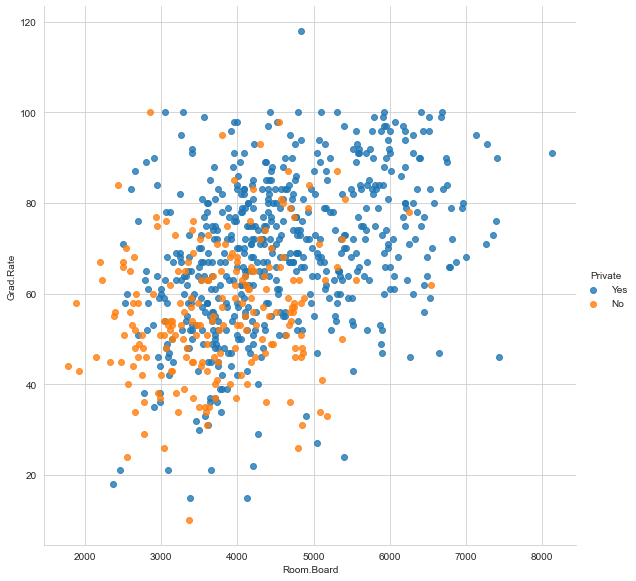

In [8]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(10,8))
sns.lmplot(x="Room.Board",y="Grad.Rate",data=df, hue="Private",fit_reg=False,height=8,aspect=1)

Now I will create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

In [9]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


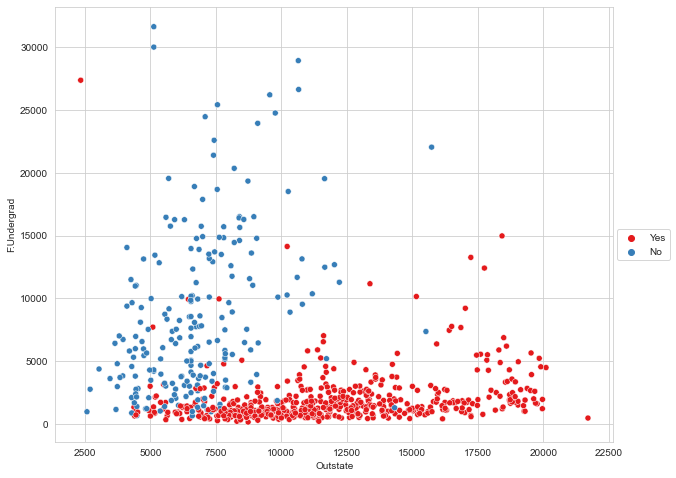

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="Outstate",y="F.Undergrad",data=df,hue="Private",palette="Set1")
plt.legend(bbox_to_anchor=[1.11,0.5])

It seems that private versus public universities tend to be reasonably different from each other. The tuition tends to be much higher for private universities. Public universities tend to have a much higher number of undergraduates. This makes sense since private universities tend to be smaller and much more expensive than public universities.

Now I will create a stacked histogram showing Out of State Tuition based on the Private column.

In [11]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


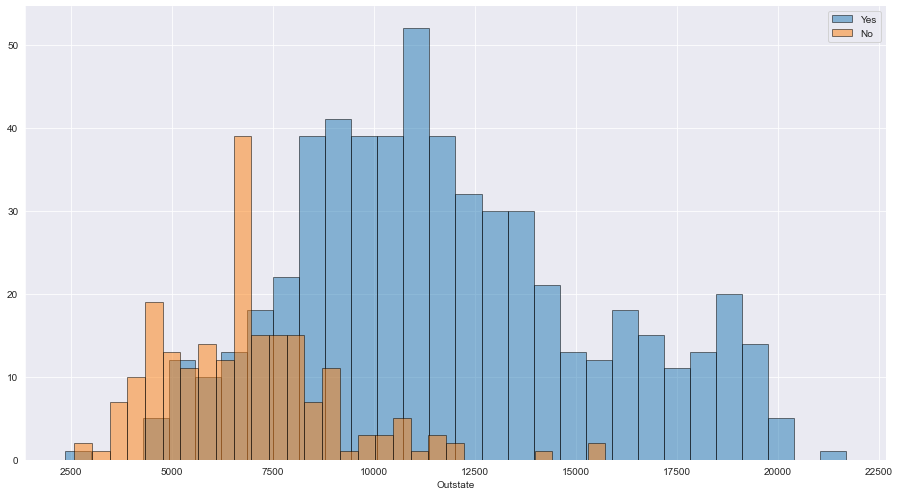

In [12]:
sns.set_style(style="darkgrid")

fg = sns.FacetGrid(data=df,hue="Private",height=7,aspect=1.8)
fg.map(plt.hist,"Outstate",alpha=0.5,bins=30,ec="k")
plt.legend(loc=0)

Out-of-state tuitions of public universities tends to be much less than private universities'.

I will now create a similar histogram for the Grad.Rate column.

In [13]:
df.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


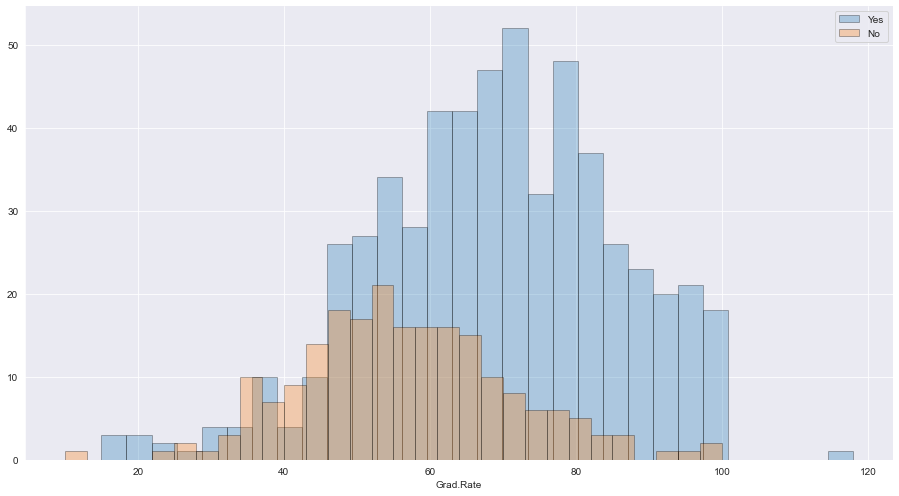

In [14]:
fg = sns.FacetGrid(data=df,hue="Private",height=7,aspect=1.8)
fg.map(plt.hist,"Grad.Rate",alpha=0.3,bins=30,ec="k")
plt.legend(loc=0)

From the graduation rate frequency count, it can be seen that both tend to be normally distributed. But, for private universities, there seems to be a graduation rate higher than 100%. This does not make sense. So, I will try to identify the universitty's name.

In [15]:
df["Grad.Rate"]>100

Abilene Christian University      False
Adelphi University                False
Adrian College                    False
Agnes Scott College               False
Alaska Pacific University         False
                                  ...  
Worcester State College           False
Xavier University                 False
Xavier University of Louisiana    False
Yale University                   False
York College of Pennsylvania      False
Name: Grad.Rate, Length: 777, dtype: bool

In [16]:
df[df["Grad.Rate"]>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [17]:
df[df["Grad.Rate"]>100]["Grad.Rate"]

Cazenovia College    118
Name: Grad.Rate, dtype: int64

I will set that school's graduation rate to 100 so it makes sense.

In [18]:
df.loc["Cazenovia College"]

Private         Yes
Apps           3847
Accept         3433
Enroll          527
Top10perc         9
Top25perc        35
F.Undergrad    1010
P.Undergrad      12
Outstate       9384
Room.Board     4840
Books           600
Personal        500
PhD              22
Terminal         47
S.F.Ratio      14.3
perc.alumni      20
Expend         7697
Grad.Rate       118
Name: Cazenovia College, dtype: object

In [19]:
df.loc["Cazenovia College"]["Grad.Rate"]

118

In [20]:
df.loc["Cazenovia College","Grad.Rate"] = 100

In [21]:
# check if value was changed.

df.loc["Cazenovia College"]["Grad.Rate"]

100

In [22]:
df[df["Grad.Rate"]>100]

# empty dataframe returned.

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


I will create the same histogram for the Grad.Rate column.

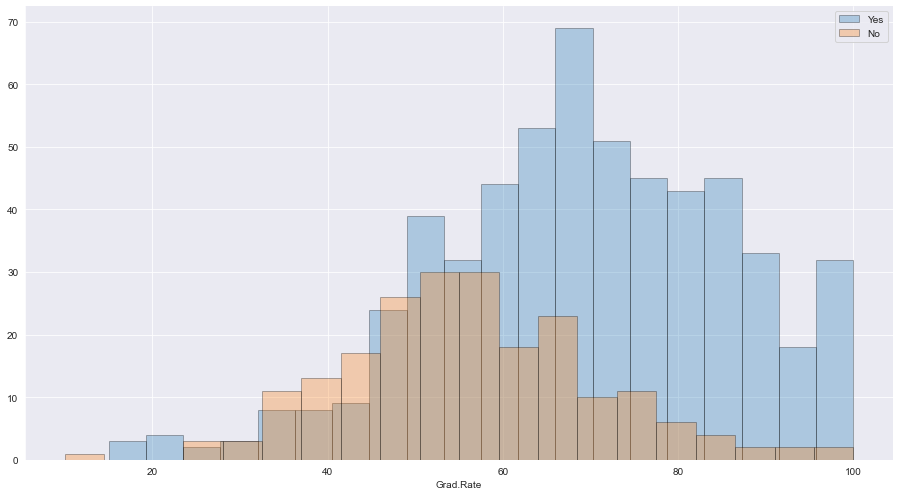

In [23]:
fg = sns.FacetGrid(data=df,hue="Private",height=7,aspect=1.8)
fg.map(plt.hist,"Grad.Rate",alpha=0.3,bins=20,ec="k")
plt.legend(loc=0)

Notice now, the Grad.Rate stops at 100 where it is expected.

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X = df.drop(labels="Private",axis=1)
X

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [27]:
df.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [28]:
X = scaler.fit_transform(X)
X

array([[-3.46881819e-01, -3.21205453e-01, -6.35089011e-02, ...,
        -8.67574189e-01, -5.01910084e-01, -3.17992933e-01],
       [-2.10884040e-01, -3.87029908e-02, -2.88584214e-01, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51804628e-01],
       [-4.06865631e-01, -3.76317928e-01, -4.78121319e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.68710475e-01],
       ...,
       [-2.33895071e-01, -4.23771558e-02, -9.15087008e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.60975094e-01],
       [ 1.99171118e+00,  1.77256262e-01,  5.78332661e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.96167109e+00],
       [-3.26765760e-03, -6.68715889e-02, -9.58163623e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.96167109e+00]])

In [29]:
df1 = pd.DataFrame(data=X,columns=df.columns[1:])
df1

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.948375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-0.208040,-0.205673,-0.255200,-1.336352,-1.505488,-0.126030,0.771435,-0.906289,-0.417455,-0.299280,-0.207855,-0.775861,-1.339146,1.746877,-0.706073,-0.994781,-1.487051
773,-0.269575,-0.087284,-0.091509,-0.201858,-0.444454,-0.175543,0.165435,0.268462,0.549707,0.306784,-0.133960,0.020822,-0.319632,-0.199632,0.666685,-0.090290,1.026424
774,-0.233895,-0.042377,-0.091509,0.365389,0.262901,-0.187095,-0.453053,-0.880670,-0.143730,0.409815,-0.827095,-0.346878,-0.319632,0.078441,-0.221570,-0.256241,-0.960975
775,1.991711,0.177256,0.578333,3.825595,2.182866,0.312977,-0.507606,2.337894,1.963953,0.488603,1.144424,1.430339,1.107689,-2.095582,2.120194,5.887971,1.961671


## K Means Cluster Model

In [30]:
from sklearn.cluster import KMeans

** I will create an instance of a K Means model with 2 clusters (Private and Public).**

In [31]:
kmeans = KMeans(n_clusters=2)

In [32]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [33]:
kmeans.cluster_centers_

# cluster center vectors

array([[-0.32661962, -0.30530339, -0.25143507, -0.49913749, -0.50267293,
        -0.22105053, -0.03848678, -0.45792911, -0.37283453, -0.12172587,
         0.04875211, -0.49062908, -0.47906195,  0.23583839, -0.30713916,
        -0.42464126, -0.36177249],
       [ 0.54548844,  0.50988814,  0.41992248,  0.83361106,  0.83951561,
         0.36917718,  0.06427689,  0.76478882,  0.6226721 ,  0.20329475,
        -0.08142105,  0.81940114,  0.80008284, -0.39387442,  0.51295406,
         0.70919469,  0.60419735]])

In [34]:
kmeans.inertia_
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

10467.616632653848

In [35]:
# predictions:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,

## Evaluation

There is no perfect way to evaluate clustering if there are no labels. However, since this is just a simple project, I do have the labels, so I will take advantage of this to evaluate my clusters. Please note that this will not usually happen in the real world.

I will create a new column for df called 'Cluster', which is a 1 for a private university, and a 0 for a public university.

In [36]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [37]:
def check(x):
    if x == "Yes":
        return 1
    return 0

In [38]:
df["Private"].apply(lambda x:check(x))

Abilene Christian University      1
Adelphi University                1
Adrian College                    1
Agnes Scott College               1
Alaska Pacific University         1
                                 ..
Worcester State College           0
Xavier University                 1
Xavier University of Louisiana    1
Yale University                   1
York College of Pennsylvania      1
Name: Private, Length: 777, dtype: int64

In [39]:
df["Cluster"] = df["Private"].apply(lambda x:check(x))

In [40]:
df["Cluster"].value_counts()

1    565
0    212
Name: Cluster, dtype: int64

In [41]:
df["Private"].value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [42]:
df.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1


In [43]:
pd.Series(data=kmeans.labels_,index=df.index)

Abilene Christian University      0
Adelphi University                0
Adrian College                    0
Agnes Scott College               1
Alaska Pacific University         0
                                 ..
Worcester State College           0
Xavier University                 0
Xavier University of Louisiana    0
Yale University                   1
York College of Pennsylvania      0
Length: 777, dtype: int32

In [44]:
df["labels_"] = pd.Series(data=kmeans.labels_,index=df.index)
df

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,labels_
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1,0
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1,0
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1,0
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1,0
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1,0
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1,1


I will create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,adjusted_rand_score

In [46]:
print(classification_report(df["Cluster"],kmeans.labels_))
print("\n")
print(confusion_matrix(df["Cluster"],kmeans.labels_))

              precision    recall  f1-score   support

           0       0.30      0.69      0.42       212
           1       0.77      0.40      0.53       565

    accuracy                           0.48       777
   macro avg       0.54      0.54      0.47       777
weighted avg       0.64      0.48      0.50       777



[[146  66]
 [340 225]]


In [47]:
df["Cluster"].value_counts()

1    565
0    212
Name: Cluster, dtype: int64

In [48]:
print(sum(kmeans.labels_ == 1))
print(sum(kmeans.labels_ == 0))

291
486


I will use a common metric called the adjusted rand index (ARI). The ARI uses true cluster assignments to measure the similarity between true and predicted labels.

In [49]:
ari_kmeans = adjusted_rand_score(df["Cluster"], kmeans.labels_)
ari_kmeans

-0.012097811710501125

The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments which is this particular case, and a score close to 1 would have indicated perfectly labeled clusters.

Note that the Kmeans algorithm is good in capturing structure of the data if clusters have a spherical-like shape. But,it doesn’t work well when clusters are in different shapes such as elliptical clusters. Also, Kmeans algorithm doesn’t let data points that are far-away from each other share the same cluster even though they obviously belong to the same cluster.

If there is overlapping between clusters, kmeans doesn’t have an intrinsic measure for uncertainty for the examples belong to the overlapping region in order to determine for which cluster to assign each data point.

All in all, it was a reasonable result considering the algorithm is purely using the features to cluster the universities into 2 distinct groups.